<img src='https://camo.githubusercontent.com/175fa296ff3ddb5a764a788aee45420ba6189ff2dfa28076122797af89599599/68747470733a2f2f64726976652e676f6f676c652e636f6d2f75633f6578706f72743d766965772669643d3153415142706f71477a42354354396c77786a3154306830715655357036736457' width=200 style="float:center">

# Pandas
---
**Índice:**
1. [Introdução](#I.-Introdução)
2. [Objetos](#II.-Criação-do-objeto)
3. [Seleção](#III.-Seleção)
4. [Operações](#IV.-Operações)
5. [Junção de dados](#V.-Junção-de-dados)
6. [Agrupamento](#VI.-Agrupamento)
7. [Reformatando](#VII.-Reformatando)
8. [Séries temporais](#VIII.-Séries-temporais)
9. [Categorização](#IX.-Categorização)
10. [Gráficos](#X.-Gráficos)
11. [Entrada e saída de dados](#XI.-Entrada-e-saída-de-dados)
12. [Outros problemas](#XII.-Outros-problemas)

<img src="https://freesvg.org/img/laurent_panda_point_d_interrogation.png" style="float:left" width=100pt></img>
**Fontes:**
* [Pandas Documentation](https://pandas.pydata.org/docs/)
* [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Pandas Getting Started](https://pandas.pydata.org/docs/getting_started/index.html)
* [10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)
* [Bancos de dados](https://pt.wikipedia.org/wiki/Banco_de_dados) (para aprimorar os conhecimentos)
    * [SQL](https://www.w3schools.com/sql/default.asp)

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/videoseries?list=PLdI5ScTnQlX_giV-8vTYgMrZ7JdFBRFeD" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## I. Introdução
---
**Vídeo:** https://youtu.be/0nF8mkVdc1c

A ideia da biblioteca Pandas é realizar operações rápidas em um uma estrutura de dados como um banco de dados ou uma planilha.

O Pandas utiliza muito do processamento e das características do NumPy.

> **Dicas:**
* Biblioteca é exetremamente vasta, sempre estude um pouco mais para conhecer novos métodos.
* *Não se deixe empacar por algum método do Pandas que você não está conseguindo utilizar*, existirá outras *N* formas de resolver o mesmo problema utilizando outros métodos.
* É interessante começar a estudar um pouco sobre **banco de dados**, pois muito  do que o Pandas é capaz de fazer está relacionado com operações que são realizadas nessas estruturas.

Importação de bibliotecas.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## II. Objetos
---
**Índice**
1. [Series](#1-Series)
2. [DataFrame](#2-DataFrame)
3. [Index](#3-Index)

**Fontes:**
* [Data Structure Intro section](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro).


### 1 Series
**Vídeo:** https://youtu.be/KJS8gNM8yV4

Um objeto `pd.Series` retrata um np.ndarray 1-D com índices nomeados.

```python
pd.Series(
    data=None,     # Dados de entrada: array-like, Iterable, dict ou scalar value
    index=None,    # Índice: array-like ou Index (1-D)
    dtype=None,    # Tipo dos dados, opcional: str, np.dtype ou ExtentionDtype
    name=None,     # Nome da série, opcional: str
    copy=False,    # Se deve copiar os dados de "data": bool
)
```

Criando um [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) com uma lista de valores. O pandas criará o índice com inteiros:

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=list('abcdef'), name='Serie1')
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
Name: Serie1, dtype: float64

#### Exercício 1
Crie dois objeto Series distintos:
* nome das variáveis: `s1_ex01` e `s2_ex01`
* nomeados,
* com valores inteiros aleatórios de distribuição uniforme,
* tamanho 10
* índice 0 a 9

### 2 DataFrame
**Vídeo:** https://youtu.be/KJS8gNM8yV4

* Dados tabelados em duas dimensões,
* possivelmente heterogêneos,
* linhas e colunas nomeadas,
* operações aritméticas em linhas ou colunas
* Pode ser imaginado como um `dict` de `pd.Series`.

```python
pd.DataFrame(
    data=None,    # ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    index=None,   # Index ou array-like, padrão: RangeIndex
                  # Índice das linhas
    columns=None, # Index ou array-like
                  # Cabeçalho (índice) das colunas
    dtype=None,   # dtype
                  # Força o tipo de dado. Se None, infere.
)
```

#### Criando um [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)


Com colunas nomeadas e índice definido:

Entradas:
* NumPy array (np.array),
* datetime (será o índice).

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.762420,1.450398,-1.109476,1.265186
1,-0.499884,-0.194947,0.724536,-1.161091
2,-0.529498,0.009551,0.857248,0.733360
3,-0.988143,-2.679477,1.471886,-1.807367
4,-0.615046,0.093353,0.487800,0.904304
5,-0.667708,0.427928,-2.412935,-0.553455


`pd.DataFrame` de um `dict`

*O `dict` deve conter objetos que podem ser convertidos em series-like*.

In [ ]:
df2 = pd.DataFrame(
    {'A': 1.,
     'B': pd.Timestamp('20130102'),
     'C': pd.Series(1, index=list(range(4)), dtype='float32'),
     'D': np.array([3] * 4, dtype='int32'),
     'E': pd.Categorical(["test", "train", "test", "train"]),
     'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


O `DataFrame` resulante possui colunas de diferentes [dtypes](https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes).

In [ ]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Existem inúmeros métodos para um `DataFrame`:
```
df2.<TAB>
df2.A              df2.append(          df2.boxplot(
df2.B              df2.apply(           df2.clip(
df2.C              df2.applymap(        df2.clip_lower(
df2.D              df2.as_blocks(       df2.clip_upper(
df2.E              df2.as_matrix(       df2.columns
df2.F              df2.asfreq(          df2.combine(
df2.T              df2.asof(            df2.combine_first(
df2.abs(           df2.assign(          df2.compound(
df2.add(           df2.astype(          df2.copy(
df2.add_prefix(    df2.at(              df2.corr(
df2.add_suffix(    df2.at_time(         df2.corrwith(
df2.agg(           df2.axes             df2.count(
df2.aggregate(     df2.between_time(	df2.cov(
df2.align(         df2.bfill(           df2.cummax(
df2.all(		   df2.blocks           ...
df2.any(		   df2.bool(
```

Tente aqui:

In [ ]:
# df2. # Coloque o cursor depois do "." e aperte o TAB do teclado (ou CTRL + Espaço caso esteja usando outra plataforma que não o Jupyter Notebook)

#### Exercício 2
Junte as Series criadas no [Exercício 1](#Exercício-1), `s1_ex01` e `s2_ex01` em um `DataFrame`:
* nome da variável: `df1_ex02`
* dtype: ponto flutuante
* acrescente mais uma coluna `'s03'` com valores `np.nan`

#### Atributos `indices` & `columns`
**Vídeo:** https://youtu.be/QWB_JuL4QlI

In [ ]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

#### Atributos `shape`& `size`

In [ ]:
df.shape

(6, 4)

In [ ]:
df.size

24

#### Métodos `head()` & `tail()`
```python
df.head(
    n=5 # Mostra as n primeiras linhas: int
) 
df.tail(
    n=5 # Mostra as n (5) últimas linhas: int
)
```

**Fontes:**
* [Basics](https://pandas.pydata.org/docs/user_guide/basics.html#basics).

In [ ]:
df.head(3)

,A,B,C,D
0,0.762420,1.450398,-1.109476,1.265186
1,-0.499884,-0.194947,0.724536,-1.161091
2,-0.529498,0.009551,0.857248,0.733360


In [ ]:
df.tail() # default de 5 linhas

,A,B,C,D
1,-0.499884,-0.194947,0.724536,-1.161091
2,-0.529498,0.009551,0.857248,0.733360
3,-0.988143,-2.679477,1.471886,-1.807367
4,-0.615046,0.093353,0.487800,0.904304
5,-0.667708,0.427928,-2.412935,-0.553455


#### Método `to_numpy()`

Retorna uma representação do Numpy dos dados com `dtype` comum a todos os valores no `DataFrame`.

**Obs:** Há custo computacional para avaliar cada `dtype` de cada valor no `DataFrame` e realizar cópias e conversões, isso o torna um método possivelmente lento.

```python
to_numpy(
    dtype=None, # str or numpy.dtype¹
                # dtype para passar para o método "numpy.asarray"²
    copy=False # bool, padrão: False
               # True -> Garante que a aída é uma cópia e não
               # uma visualização de um outro array.
               # **False não garante que não será feita uma cópia
)
```

**Fontes:**
* [`to_numpy`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)
* [`numpy.dtype`](https://numpy.org/doc/stable/reference/generated/numpy.dtype.html)
* [`numpy.asarray()`](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html)

Para `df`, composto por valores `float`, `to_numpy()` retorna rapidamente o resultado, sem necessidade de cópia dos dados.

In [ ]:
df

,A,B,C,D
0,0.762420,1.450398,-1.109476,1.265186
1,-0.499884,-0.194947,0.724536,-1.161091
2,-0.529498,0.009551,0.857248,0.733360
3,-0.988143,-2.679477,1.471886,-1.807367
4,-0.615046,0.093353,0.487800,0.904304
5,-0.667708,0.427928,-2.412935,-0.553455


In [ ]:
%%time
df.to_numpy()

CPU times: user 73 µs, sys: 10 µs, total: 83 µs
Wall time: 89.2 µs


array([[ 0.76242008,  1.45039779, -1.10947559,  1.26518608],
       [-0.49988424, -0.19494734,  0.7245357 , -1.16109059],
       [-0.52949849,  0.00955144,  0.85724757,  0.73336002],
       [-0.98814333, -2.67947663,  1.4718863 , -1.80736669],
       [-0.61504583,  0.09335272,  0.48780044,  0.90430422],
       [-0.66770786,  0.42792766, -2.41293505, -0.5534555 ]])

Como o `DataFrame` `df2` possui múltiplos **dtypes**, o método se torna relativamente custoso.

In [ ]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [ ]:
%%time
df2.to_numpy()

CPU times: user 1.36 ms, sys: 41 µs, total: 1.4 ms
Wall time: 1.64 ms


array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

>**Nota:**
* `DataFrame.to_numpy()` não inclui os rótulos (linhas ou colunas) na saída.

#### Método `describe()`
Estatística rápida dos dados.

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.422977,-0.148866,0.003177,-0.103177
std,0.606403,1.369687,1.464060,1.250074
min,-0.988143,-2.679477,-2.412935,-1.807367
25%,-0.654542,-0.143823,-0.710157,-1.009182
50%,-0.572272,0.051452,0.606168,0.089952
75%,-0.507288,0.344284,0.824070,0.861568
max,0.762420,1.450398,1.471886,1.265186


#### Método `T`
Transposição dos dados:

In [ ]:
df.T

,0,1,2,3,4,5
A,0.762420,-0.499884,-0.529498,-0.988143,-0.615046,-0.667708
B,1.450398,-0.194947,0.009551,-2.679477,0.093353,0.427928
C,-1.109476,0.724536,0.857248,1.471886,0.487800,-2.412935
D,1.265186,-1.161091,0.733360,-1.807367,0.904304,-0.553455


#### Método `sort_index()`
Ordenando na direção do rótulo.

In [ ]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
5,-0.667708,0.427928,-2.412935,-0.553455
4,-0.615046,0.093353,0.487800,0.904304
3,-0.988143,-2.679477,1.471886,-1.807367
2,-0.529498,0.009551,0.857248,0.733360
1,-0.499884,-0.194947,0.724536,-1.161091
0,0.762420,1.450398,-1.109476,1.265186


In [ ]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
0,1.265186,-1.109476,1.450398,0.762420
1,-1.161091,0.724536,-0.194947,-0.499884
2,0.733360,0.857248,0.009551,-0.529498
3,-1.807367,1.471886,-2.679477,-0.988143
4,0.904304,0.487800,0.093353,-0.615046
5,-0.553455,-2.412935,0.427928,-0.667708


#### Método `sort_values()`
Ordenando pelos valores:

In [ ]:
df.sort_values(by='B')

,A,B,C,D
3,-0.988143,-2.679477,1.471886,-1.807367
1,-0.499884,-0.194947,0.724536,-1.161091
2,-0.529498,0.009551,0.857248,0.733360
4,-0.615046,0.093353,0.487800,0.904304
5,-0.667708,0.427928,-2.412935,-0.553455
0,0.762420,1.450398,-1.109476,1.265186


#### Exercício 3
Com o `DataFrame` `df1_ex02` criado no [Exercício 2](#Exercício-2):
* nome da variável: `df1_ex03`
* ordene de forma decrescente o `df1_ex02` pela coluna de `s1_ex01`;
* verifique o que faz e aplique o método `reset_index` nos dados resultantes;
* faça a estatística básica dos seus dados.


### 3 Index
Como vimos, os índices são um diferencial para as estruturas do Pandas, vamos dar uma olhada no que são capazes.

**Vídeo:** https://youtu.be/9Sn2QpPawwI

**Fontes:**
* [Indexing](https://pandas.pydata.org/pandas-docs/stable/reference/indexing.html)



#### Numeric Index
```python
RangeIndex([start, stop, step, dtype, copy, …]) # Immutable Index implementing a monotonic integer range.
Int64Index([data, dtype, copy, name])           # Immutable sequence used for indexing and alignment.
UInt64Index([data, dtype, copy, name])          # Immutable sequence used for indexing and alignment.
Float64Index([data, dtype, copy, name])         # Immutable sequence used for indexing and alignment.
```
Quando não informamos o índice de uma serie ou tabela ao Pandas, ele automaticamente cria um índice `pd.RangeIndex` com tamanho igual ao número de dados.

In [ ]:
pd.Series(range(100)).index

RangeIndex(start=0, stop=100, step=1)

Semelhante a `range`e `np.arange`.

In [ ]:
pd.RangeIndex(start=1, stop=10., step=2)

RangeIndex(start=1, stop=10, step=2)

O que tem dentro dessa caixa preta?

In [ ]:
[i for i in pd.RangeIndex(start=1, stop=10., step=2)]

[1, 3, 5, 7, 9]

In [ ]:
pd.Series(np.random.rand(10), index=pd.RangeIndex(1, 20, 2), name='RangeIndex')

1     0.850249
3     0.167407
5     0.934783
7     0.958531
9     0.398373
11    0.899547
13    0.575045
15    0.383065
17    0.679580
19    0.739666
Name: RangeIndex, dtype: float64

#### CategoricalIndex
```python
CategoricalIndex([data, categories, …]) # Index based on an underlying Categorical.
```
Um índice categórico pode ser imaginado como por exemplo uma linha nomeada por uma palavra em uma planilha. Serão mais explorados em [9. Categorização](#9.-Categorização).

In [ ]:
pd.CategoricalIndex(list('abcdacb'))

CategoricalIndex(['a', 'b', 'c', 'd', 'a', 'c', 'b'], categories=['a', 'b', 'c', 'd'], ordered=False, dtype='category')

In [ ]:
idx = pd.CategoricalIndex(list('cdacb'), ordered=True, categories=list('dbac'))
print('Agora temos um mínimo "%s" e um máximo "%s" definidos.'%(idx.min(), idx.max()))

Agora temos um mínimo "d" e um máximo "c" definidos.


#### IntervalIndex
```python
IntervalIndex(data[, closed, dtype, copy, …]) # Immutable index of intervals that are closed on the same side.
```
Este é um tipo de índice com intervalos, normalmente construído com o método `pd.interval_range`.

In [ ]:
i_idx = pd.interval_range(start=15, end=25, periods=5, closed='right')
i_idx

IntervalIndex([(15, 17], (17, 19], (19, 21], (21, 23], (23, 25]],
              closed='right',
              dtype='interval[int64]')

In [ ]:
pd.DataFrame([10, 50, 30, 10, 5], index=i_idx, columns=['Contagem de alunos pela idade'])

,Contagem de alunos pela idade
"(15, 17]",10
"(17, 19]",50
"(19, 21]",30
"(21, 23]",10
"(23, 25]",5


#### DatetimeIndex
```python
DatetimeIndex([data, freq, tz, normalize, …]) # Immutable ndarray-like of datetime64 data.
```
Este é um índice para séries temporais com data e hora. Um jeito fácil de criar um `DatetimeIndex` é utilizando o `pd.date_range`.

In [ ]:
pd.date_range(
    start='20200101',
    end='20210301',
    periods=6,
)

DatetimeIndex(['2020-01-01', '2020-03-26', '2020-06-19', '2020-09-12',
               '2020-12-06', '2021-03-01'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
pd.date_range(
    start='20200101',
    end='20200101 00:59:59',
    freq='s',
)

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09',
               ...
               '2020-01-01 00:59:50', '2020-01-01 00:59:51',
               '2020-01-01 00:59:52', '2020-01-01 00:59:53',
               '2020-01-01 00:59:54', '2020-01-01 00:59:55',
               '2020-01-01 00:59:56', '2020-01-01 00:59:57',
               '2020-01-01 00:59:58', '2020-01-01 00:59:59'],
              dtype='datetime64[ns]', length=3600, freq='S')

#### Exercício 4
Faça o que se pede:
* crie um `DatetimeIndex`:
    * nome da variável: `dates1_ex04`
    * começando em *01/01/2021*,
    * com frequência de amostragem de *1 h*,
    * com *10 períodos*,
    * **dica:** utilize o método `date_range()`;
* crie um `DataFrame`:
    * nome da variável: `df1_ex04`,
    * índice: `dates_ex04`,
    * valores e nomes das colunas idênticos ao `df1_ex03` do [Exercício 3](#Exercício-3).

## III. Seleção
---
**Vídeo:** https://youtu.be/HyddRgytuuQ

**Índice:**
1. [Seleção](#1-Seleção)
2. [Seleção por rótulo](#2-Seleção-por-rótulo)
3. [Seleção multi-eixo](#3-Seleção-multi-eixo)
4. [Seleção pela posição](#4-Seleção-pela-posição)
5. [Indexação por Booleano](#5-Indexação-por-Booleano)
6. [Configurando](#6-Configurando)
7. [Reindexar](#7-Reindexar)
7. [Dados Faltentes](#8-Dados-Faltantes)

A *seleção* é um método de bancos de dados onde a massa de dados é filtrada através de alguma especificação do usuário e é gerada uma visualozação dos dados filtrados.

Enquanto as expressões padrão Python/Numpy para seleção e alteração são intuitivas, no trabalho com o pandas existem métodos otimizados de acesso aos dados: ``.at``, ``.iat``, `.loc` e `.iloc`.

**Fontes:**
* [Bancos de dados: SELECT](https://pt.wikipedia.org/wiki/Select_(SQL))
* [Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing)
* [Advanced](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).

### 1 Seleção

Selecionando uma coluna para produzir uma `Series`

In [ ]:
df['A']

0    0.762420
1   -0.499884
2   -0.529498
3   -0.988143
4   -0.615046
5   -0.667708
Name: A, dtype: float64

Selecionando uma coluna para produzir um `DataFrame`.

In [ ]:
df[['A']]

,A
0,0.762420
1,-0.499884
2,-0.529498
3,-0.988143
4,-0.615046
5,-0.667708


Seleção de linhas por `[ ]`:

In [ ]:
df[0:3] # índices inteiros

,A,B,C,D
0,0.762420,1.450398,-1.109476,1.265186
1,-0.499884,-0.194947,0.724536,-1.161091
2,-0.529498,0.009551,0.857248,0.733360


Quando temos um índice do tipo `DatetimeIndex`.

In [ ]:
dates = pd.date_range('20130101', periods=6)
df.index = dates
df

,A,B,C,D
2013-01-01,0.762420,1.450398,-1.109476,1.265186
2013-01-02,-0.499884,-0.194947,0.724536,-1.161091
2013-01-03,-0.529498,0.009551,0.857248,0.733360
2013-01-04,-0.988143,-2.679477,1.471886,-1.807367
2013-01-05,-0.615046,0.093353,0.487800,0.904304
2013-01-06,-0.667708,0.427928,-2.412935,-0.553455


In [ ]:
df['20130102':'20130104'] # Índices com os nomes das linhas

,A,B,C,D
2013-01-02,-0.499884,-0.194947,0.724536,-1.161091
2013-01-03,-0.529498,0.009551,0.857248,0.733360
2013-01-04,-0.988143,-2.679477,1.471886,-1.807367


### 2 Seleção por rótulo
**Fonte:**
* [Indexing by Label](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label).

Seleção de linha por rótulo:

In [ ]:
df.loc[dates[0]]

A    0.762420
B    1.450398
C   -1.109476
D    1.265186
Name: 2013-01-01 00:00:00, dtype: float64

### 3 Seleção multi-eixo

Por rótulo de coluna:

In [ ]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,0.762420,1.450398
2013-01-02,-0.499884,-0.194947
2013-01-03,-0.529498,0.009551
2013-01-04,-0.988143,-2.679477
2013-01-05,-0.615046,0.093353
2013-01-06,-0.667708,0.427928


*Slicing* de linhas e por rótulo de coluna. **O intervalo é fechado**

In [ ]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.499884,-0.194947
2013-01-03,-0.529498,0.009551
2013-01-04,-0.988143,-2.679477


Especificação de colunas e linhas:

In [ ]:
df.loc['20130102', ['A', 'B']]

A   -0.499884
B   -0.194947
Name: 2013-01-02 00:00:00, dtype: float64

Obtendo um único valor:

In [ ]:
df.loc[dates[0], 'A']

0.7624200753293203

Acesso rápido à um valor:

In [ ]:
df.at[dates[0], 'A']

0.7624200753293203

### 4 Seleção pela posição
**Fontes:**
* [Selection by Position](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer).

Seleção com entrada de índice inteiro:

In [ ]:
df.iloc[3]

A   -0.988143
B   -2.679477
C    1.471886
D   -1.807367
Name: 2013-01-04 00:00:00, dtype: float64

Slicing multi-eixo com inteiros, similar ao Numpy/Python:

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.988143,-2.679477
2013-01-05,-0.615046,0.093353


Seleção com inteiros, similar ao Numpy/Python:

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.499884,0.724536
2013-01-03,-0.529498,0.857248
2013-01-05,-0.615046,0.487800


Slicing linhas:

In [ ]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.499884,-0.194947,0.724536,-1.161091
2013-01-03,-0.529498,0.009551,0.857248,0.733360


Slicing colunas:

In [ ]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.450398,-1.109476
2013-01-02,-0.194947,0.724536
2013-01-03,0.009551,0.857248
2013-01-04,-2.679477,1.471886
2013-01-05,0.093353,0.487800
2013-01-06,0.427928,-2.412935


Obter um valor:

In [ ]:
df.iloc[1, 1]

-0.19494734045675355

Acesso rápido (equivalente a `.at`):

In [ ]:
df.iat[1, 1]

-0.19494734045675355

### 5 Indexação por Booleano

Condicional em determinada coluna, utilizando rótulo:

In [ ]:
df['A'] > 0

2013-01-01     True
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
2013-01-06    False
Freq: D, Name: A, dtype: bool

In [ ]:
df.loc[df['A'] > 0]

,A,B,C,D
2013-01-01,0.76242,1.450398,-1.109476,1.265186


Condicional de `DataFrame` inteiro:

In [ ]:
df[df > 0]

,A,B,C,D
2013-01-01,0.76242,1.450398,NaN,1.265186
2013-01-02,NaN,NaN,0.724536,NaN
2013-01-03,NaN,0.009551,0.857248,0.733360
2013-01-04,NaN,NaN,1.471886,NaN
2013-01-05,NaN,0.093353,0.487800,0.904304
2013-01-06,NaN,0.427928,NaN,NaN


Usando o método [isin()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html#pandas.Series.isin) para filtrar:

In [ ]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,0.762420,1.450398,-1.109476,1.265186,one
2013-01-02,-0.499884,-0.194947,0.724536,-1.161091,one
2013-01-03,-0.529498,0.009551,0.857248,0.733360,two
2013-01-04,-0.988143,-2.679477,1.471886,-1.807367,three
2013-01-05,-0.615046,0.093353,0.487800,0.904304,four
2013-01-06,-0.667708,0.427928,-2.412935,-0.553455,three


In [ ]:
df2[df2['E'].isin(['one', 'four'])]

,A,B,C,D,E
2013-01-01,0.762420,1.450398,-1.109476,1.265186,one
2013-01-02,-0.499884,-0.194947,0.724536,-1.161091,one
2013-01-05,-0.615046,0.093353,0.487800,0.904304,four


### 6 Configurando
**Vídeo:** https://youtu.be/8r4AHIhiC-I

Configurando uma nova coluna alinhando automaticamente aos índices das linhas.

In [ ]:
# Criando o índice de datas
dates = pd.date_range('20130102', periods=5)
dates

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Criando o objeto do tipo Series
s1 = pd.Series([1, 2, 3, 4, 5], index=dates)
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
Freq: D, dtype: int64

In [ ]:
# Alinhando o Series s1 ao df através de uma nova coluna 'F'
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.762420,1.450398,-1.109476,1.265186,NaN
2013-01-02,-0.499884,-0.194947,0.724536,-1.161091,1.0
2013-01-03,-0.529498,0.009551,0.857248,0.733360,2.0
2013-01-04,-0.988143,-2.679477,1.471886,-1.807367,3.0
2013-01-05,-0.615046,0.093353,0.487800,0.904304,4.0
2013-01-06,-0.667708,0.427928,-2.412935,-0.553455,5.0


In [ ]:
# Configurando valores por rótulo
df.at['20130102', 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.762420,1.450398,-1.109476,1.265186,NaN
2013-01-02,0.000000,-0.194947,0.724536,-1.161091,1.0
2013-01-03,-0.529498,0.009551,0.857248,0.733360,2.0
2013-01-04,-0.988143,-2.679477,1.471886,-1.807367,3.0
2013-01-05,-0.615046,0.093353,0.487800,0.904304,4.0
2013-01-06,-0.667708,0.427928,-2.412935,-0.553455,5.0


In [ ]:
# Configurando valores por posição
df.iat[0, 1] = 0
df

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,1.265186,NaN
2013-01-02,0.000000,-0.194947,0.724536,-1.161091,1.0
2013-01-03,-0.529498,0.009551,0.857248,0.733360,2.0
2013-01-04,-0.988143,-2.679477,1.471886,-1.807367,3.0
2013-01-05,-0.615046,0.093353,0.487800,0.904304,4.0
2013-01-06,-0.667708,0.427928,-2.412935,-0.553455,5.0


In [ ]:
# Configurando com um array Numpy
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,NaN
2013-01-02,0.000000,-0.194947,0.724536,5,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5,5.0


Operação de seleção com configuração.

In [ ]:
df2 = df.copy()

# Invertendo o sinal de todos os valores de df2 para negativo
df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,-0.762420,0.000000,-1.109476,-5,NaN
2013-01-02,0.000000,-0.194947,-0.724536,-5,-1.0
2013-01-03,-0.529498,-0.009551,-0.857248,-5,-2.0
2013-01-04,-0.988143,-2.679477,-1.471886,-5,-3.0
2013-01-05,-0.615046,-0.093353,-0.487800,-5,-4.0
2013-01-06,-0.667708,-0.427928,-2.412935,-5,-5.0


### 7 Reindexar
Permite trocar/adicionar/deletar o índice em um eixo específico.

Retorna uma cópia dos dados

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,NaN
2013-01-02,0.000000,-0.194947,0.724536,5,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5,5.0


In [ ]:
# Adiciona uma nova coluna com os índices já existentes
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-02,0.000000,-0.194947,0.724536,5,1.0,NaN
2013-01-03,-0.529498,0.009551,0.857248,5,2.0,NaN
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0,NaN
2013-01-05,-0.615046,0.093353,0.487800,5,4.0,NaN


In [ ]:
# Insere o valor 1 nas duas primeiras linhas de 'E'
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-02,0.000000,-0.194947,0.724536,5,1.0,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0,1.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0,NaN
2013-01-05,-0.615046,0.093353,0.487800,5,4.0,NaN


## IV. Operações
---
**Vídeo:** https://youtu.be/nhcP3oY9ry8

**Índice:**
1. [Estatística](#1-Estatística)
2. [Broadcasting](#2-Broadcasting)
3. [Aplicação de funções](#3-Aplicação-de-funções)
4. [Histogramas](#4-Histogramas)
5. [Métodos de String](#5-Métodos-de-String)
6. [Dados Faltantes](#6-Dados-Faltantes)
7. [Janela Móvel](#7-Janela-Móvel)

Obviamente desejamos realizar operações com os dados que possuímos, portanto veremos como operar com os dados com auxílio dos métodos do Pandas.

**Fontes:**
* [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### 1 Estatística
No geral, excluem os dados faltantes (NaN).

Estatística descritiva:

In [ ]:
df.mean()

A   -0.339663
B   -0.390599
C    0.003177
D    5.000000
F    3.000000
dtype: float64

Agora no eixo das linhas:

In [ ]:
df.mean(axis=1)

2013-01-01    1.163236
2013-01-02    1.305918
2013-01-03    1.467460
2013-01-04    1.160853
2013-01-05    1.793221
2013-01-06    1.469457
Freq: D, dtype: float64

Criando um `DataFrame` com as estatísticas.

In [ ]:
pd.DataFrame([df.mean(), df.std(), df.var(), df.min(), df.max()],
             index=['mean', 'std', 'var', 'min', 'max'])

,A,B,C,D,F
mean,-0.339663,-0.390599,0.003177,5.0,3.000000
std,0.627690,1.139660,1.464060,0.0,1.581139
var,0.393994,1.298825,2.143471,0.0,2.500000
min,-0.988143,-2.679477,-2.412935,5.0,1.000000
max,0.762420,0.427928,1.471886,5.0,5.000000


In [ ]:
df.corr()

,A,B,C,D,F
A,1.000000,0.420344,-0.312662,NaN,-0.627696
B,0.420344,1.000000,-0.606105,NaN,0.167361
C,-0.312662,-0.606105,1.000000,NaN,-0.691533
D,NaN,NaN,NaN,NaN,NaN
F,-0.627696,0.167361,-0.691533,NaN,1.000000


In [ ]:
df.cov()

,A,B,C,D,F
A,0.393994,0.300694,-0.287329,0.0,-0.355241
B,0.300694,1.298825,-1.011305,0.0,0.332388
C,-0.287329,-1.011305,2.143471,0.0,-1.661097
D,0.000000,0.000000,0.000000,0.0,0.000000
F,-0.355241,0.332388,-1.661097,0.0,2.500000


### 2 Broadcasting

Operando com objetos de dimensões diferentes, o Pandas automaticamente realiza o Broadcasting na dimensão que necessita de alinhamento.

In [ ]:
# Cria uma série em Pandas com os valores inseridos.
# Desloca os dados em duas linhas para baixo
dates = pd.date_range('20130101', periods=6)
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [ ]:
# Subtrai df de s através da direção index (linha)
# Mesmo efeito de `DataFrame` - other, porém é possível especificar o eixo da operação e como preencher os NaN's
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.529498,-0.990449,-0.142752,4.0,1.0
2013-01-04,-3.988143,-5.679477,-1.528114,2.0,0.0
2013-01-05,-5.615046,-4.906647,-4.512200,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


De forma equivalente:

|Função|Operação|
|-|-|
|`add`|`+`|
|`sub`|`-`|
|`mul`|`*`|
|`div`|`/`,`//`|
|`mod`|`%`|
|`pow`|`**`|

### 3 Aplicação de funções
Aplicar funções aos dados:

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,NaN
2013-01-02,0.000000,-0.194947,0.724536,5,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5,5.0


In [ ]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,NaN
2013-01-02,0.762420,-0.194947,-0.384940,10,1.0
2013-01-03,0.232922,-0.185396,0.472308,15,3.0
2013-01-04,-0.755222,-2.864873,1.944194,20,6.0
2013-01-05,-1.370268,-2.771520,2.431994,25,10.0
2013-01-06,-2.037975,-2.343592,0.019059,30,15.0


In [ ]:
# Criar uma função lambda, função rápida
foo = lambda x: x.max() - x.min()
# def foo(x):
#     return x.max() - x.min()
df.apply(foo, axis=1)

2013-01-01    6.109476
2013-01-02    5.194947
2013-01-03    5.529498
2013-01-04    7.679477
2013-01-05    5.615046
2013-01-06    7.412935
Freq: D, dtype: float64

#### Lambdas
Expressões/Fórmulas são usadas para friar funções anônimas
```python
def <lambda>(parameters):
    return expression

# lambda equivalente
lambda parameters: expression
```

### 4 Histogramas
**Fontes:**
* [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

Contagem de valores.

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    5
2    2
3    2
4    3
5    3
6    2
7    2
8    0
9    0
dtype: int64

In [ ]:
s.value_counts()

2    4
3    2
0    2
6    1
5    1
dtype: int64

In [ ]:
hist = pd.Series(np.random.randn(200)).value_counts(bins=10, sort=False)
hist

(-3.109, -2.453]     2
(-2.453, -1.805]     5
(-1.805, -1.157]    15
(-1.157, -0.508]    39
(-0.508, 0.14]      53
(0.14, 0.788]       40
(0.788, 1.437]      27
(1.437, 2.085]      15
(2.085, 2.733]       3
(2.733, 3.382]       1
dtype: int64

Calculando as probabilidades de cada intervalo.

In [ ]:
P = hist/hist.sum()
P

(-3.109, -2.453]    0.010
(-2.453, -1.805]    0.025
(-1.805, -1.157]    0.075
(-1.157, -0.508]    0.195
(-0.508, 0.14]      0.265
(0.14, 0.788]       0.200
(0.788, 1.437]      0.135
(1.437, 2.085]      0.075
(2.085, 2.733]      0.015
(2.733, 3.382]      0.005
dtype: float64

Plotando.

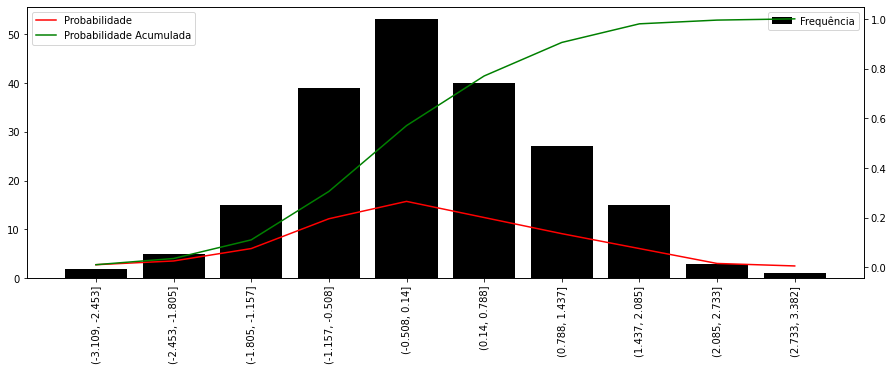

In [ ]:
# Criando figura e eixos
fig, ax = plt.subplots(figsize=(15,5))
ax2 = ax.twinx()
# Gráfico de barras
ax.bar(range(hist.shape[0]), hist, facecolor='k')
ax.legend(['Frequência'], loc=1)
# Gráficos de linhas
ax2.plot(range(hist.shape[0]), P, 'r',
         range(hist.shape[0]), P.cumsum(), 'g')
ax2.legend(['Probabilidade', 'Probabilidade Acumulada'], loc=2)
# Ajustes finais
ax.set_xticks(range(hist.shape[0]))
ax.set_xticklabels(labels=hist.index, rotation=90)
plt.show()

#### Exercício 5
Transforme o código acima em uma função `plot_hist(s, bins=20)` que possua como entrada somente o objeto `Series` e o número de `bins`, plote o histograma e retorne uma `Series` com as frequências dos dados nos intervalos dos bins, conforme exemplificado na variável `hist` acima.
Faça também:
* entenda como foi gerado o gráfico do plot acima recorrendo às documentações das bibliotecas;
* busque uma forma de juntar as legendas dos gráficos de linhas e de barras;
    * **dica:** pesquise no google com a busca em inglês;
* aplique a função às `Series` `s1_ex01` e `s2_ex01` do [Exercício 1](#Exercício-1), variando o `bins`;
* utilizando o exemplo que gerou a variável `hist`, crie um objeto `Series` de *50* números aleatórios com distribuição normal, média *5* e variância *25*;
* aplique a função criada para gerar o gráfico.

### 5 Métodos de String

É possível utilizar métodos de processamento de `str` para tratar `Series`.

**Fontes:**
* Regular Expressions
    * [Teste e aprenda](https://regexr.com/)
    * [Python - RE](https://docs.python.org/3/library/re.html)
* [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods).

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'tdog0', 'cat'])
s.str.lower()

0        a
1        b
2        c
3     aaba
4     baca
5      NaN
6     caba
7    tdog0
8      cat
dtype: object

Exemplo de `replace` utilizando RE.
Substituir a `str` (iniciada por 1 caractere qualquer + `a`) OU possuir `dog`) por `XX- `
* `^` -> começado por
* `.` -> qualquer caractere
* `a|dog`

In [ ]:
s.str.replace('^.a|dog', 'XX- ', case=False)

0         A
1         B
2         C
3    XX- ba
4    XX- ca
5       NaN
6    XX- BA
7    tXX- 0
8     XX- t
dtype: object

### 6 Dados Faltantes

Pandas usa por padrão `np.nan` para representação de dados faltantes.

Esses dados não são incluídos em cálculos.

**Fonte:**
* [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

Remover as linhas que possuem dados faltantes (NaN):

In [ ]:
df1

,A,B,C,D,F,E
2013-01-02,0.000000,-0.194947,0.724536,5,1.0,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0,1.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0,NaN
2013-01-05,-0.615046,0.093353,0.487800,5,4.0,NaN


In [ ]:
df1.dropna(how='any') # axis=0

,A,B,C,D,F,E
2013-01-02,0.000000,-0.194947,0.724536,5,1.0,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0,1.0


Populando dados faltantes (NaN):

In [ ]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-02,0.000000,-0.194947,0.724536,5,1.0,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0,1.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0,5.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0,5.0


Preencher `nan` com os métodos `df.bfill()`, `df.ffill()`.

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,NaN
2013-01-02,0.000000,-0.194947,0.724536,5,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5,5.0


In [ ]:
df.bfill()

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,1.0
2013-01-02,0.000000,-0.194947,0.724536,5,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5,5.0


In [ ]:
df.ffill(axis=1)

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5.0,5.0
2013-01-02,0.000000,-0.194947,0.724536,5.0,1.0
2013-01-03,-0.529498,0.009551,0.857248,5.0,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5.0,3.0
2013-01-05,-0.615046,0.093353,0.487800,5.0,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5.0,5.0


Obter a boolean-mask das posições dos NaN's.

In [ ]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


#### Exercício 6
Simulando a coleta de dados no PI ou em algum outro banco de dados, vamos criar um `Dataframe` com *10000* pontos e dados de *3* sensores. É pedido que:
* crie um `Dataframe` com os dados de *3* sensores:
    * nome da variável: `df1_ex06`
    * colunas: `['PT_01', 'PT_02', 'PT_03']`
    * índice: `DatetimeIndex`
        * start: *01/01/2021*
        * freq: *1 min*
    * sensores:

|PT|`bias`<br>`[bar]`|`erro`<br>`[%]`|
|-|-|-|
|`PT-01`|*2*|*6*|
|`PT-02`|*0*|*5*|
|`PT-03`|*-3*|*3*|

Os valores obedecem a equação $PT = 300 + 10\bigg(1-e^{-t/1440}\bigg)$

>Onde:
1. $PT$ : pressão em *bar* que o sensor está medindo,
2. $t$ : tempo em *min*;

* aplique o `nan_generator` ao `DataFrame` criado,
    * esta função retornará alguns pontos como `np.nan` e outros como uma `str` `'nan'`.
    * utilize o método `df1_ex06.apply()` com a função `to_numeric` para transformar as *strings* em valores numéricos;
* utilize o método `df1_ex06.plot(figsize=(15, 5), alpha=.6, grid=True, xlabel='t [dias]', ylabel='P [bar]')` para plotar os dados gerados e visualise seus resultados;
* teste também uma das funções para lidar com dados faltantes `fillna` ou `dropna`.

**Notas:**
* a distribuição Normal $N(\mu, \sigma)$ indica que:
    * os dados estão centrados em $\mu$,
    * *99,8 %* dos dados está concentrado entre $[\mu - 3\sigma, \mu + 3\sigma]$;
* a média ($\mu$) dos dados é o `bias`;
* $3\sigma$ é o `erro` $(\varepsilon)$;
    * o erro está relacionado à faixa de medição, portanto, por conveniência, pode-se considerar uma porcentagem do valor inicial *300 bar*:

$$[PT - \varepsilon, PT + \varepsilon] = PT + N(\mu = bias, \sigma = 300 \times \varepsilon/3) $$

In [ ]:
def nan_generator(df):
    df1 = df.copy()
    for column in df.columns:
        n_data = df.shape[0]
        
        nans = [.3, .5] # % de np.nan
        errors = [.1, .2] # % de 'nan'

        n_nan = np.random.randint(int(nans[0]*n_data),
                                  int(nans[1]*n_data))
        n_errors = np.random.randint(int(errors[0]*n_data),
                                     int(errors[1]*n_data))

        pos = np.random.choice(df.index, size=n_nan, replace=False)
        df1.at[pos, column] = np.nan
        
        pos = np.random.choice(df.index, size=n_errors, replace=False)
        df1.at[pos, column] = 'nan'
    return df1

### 7 Janela Móvel
Utilizando-se o método `rolling` podemos analisar uma janela móvel dos dados.
```python
df.rolling(
    window,           # Tamanho da janela: int, offset
    min_periods=None, # Número mínimo de observações em uma janela, c.c. retorna NA: int
    center=False,     # Configura o índice da resposta para o centro da janela: bool
    axis=0,           # Eixo para aplicar a janela: int
    closed=None       # Onde o intervalo é fechado: {'right', 'left', 'both', 'neither'}
                      # Default janelas de offset: 'right'.
                      # Default janelas fixas: 'both'.
)
```

In [ ]:
df

,A,B,C,D,F
2013-01-01,0.762420,0.000000,-1.109476,5,NaN
2013-01-02,0.000000,-0.194947,0.724536,5,1.0
2013-01-03,-0.529498,0.009551,0.857248,5,2.0
2013-01-04,-0.988143,-2.679477,1.471886,5,3.0
2013-01-05,-0.615046,0.093353,0.487800,5,4.0
2013-01-06,-0.667708,0.427928,-2.412935,5,5.0


In [ ]:
dfr = df.rolling(3)
dfr

Rolling [window=3,center=False,axis=0]

In [ ]:
dfr.sum() # default: closed='right'

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.232922,-0.185396,0.472308,15.0,NaN
2013-01-04,-1.517642,-2.864873,3.053670,15.0,6.0
2013-01-05,-2.132688,-2.576572,2.816934,15.0,9.0
2013-01-06,-2.270897,-2.158196,-0.453248,15.0,12.0


A janela por [`offset`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) rolará uma janela variável de acordo com o tempo especificado.

In [ ]:
df0 = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]},
                   index = [pd.Timestamp('20130101 09:00:00'),
                            pd.Timestamp('20130101 09:00:02'),
                            pd.Timestamp('20130101 09:00:03'),
                            pd.Timestamp('20130101 09:00:05'),
                            pd.Timestamp('20130101 09:00:06')])
df0

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,2.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


In [ ]:
df0.rolling('2s').sum() # default: closed='both'

,B
2013-01-01 09:00:00,0.0
2013-01-01 09:00:02,1.0
2013-01-01 09:00:03,3.0
2013-01-01 09:00:05,NaN
2013-01-01 09:00:06,4.0


## V. Junção de dados
---
**Índice:**
1. [Concat](#1-Concat)
2. [Merge](#2-Merge)

Combinação de objetos `Series` e `DataFrame`.

Utiliza vários tipos de lógica de conjuntos para indexação e álgebra relacional para operações de inclusão e união.

**Fontes:**
* [Merging section](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging).

### 1 Concat
```python
pd.concat(
    objs: Union[Iterable[~FrameOrSeries], Mapping[Union[Hashable, NoneType], ~FrameOrSeries]],
    axis=0,
    join='outer',
    ignore_index: bool = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: bool = False,
    sort: bool = False,
    copy: bool = True
)
```

Concatenação de objetos Pandas com [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat):

In [ ]:
# Cria um `DataFrame` com números aleatórios com distribuição normal
df1 = pd.DataFrame(np.random.randn(3, 1))
df2 = pd.DataFrame(np.random.randn(4, 1))

In [ ]:
pd.concat([df1, df2])

In [ ]:
pd.concat([df1, df2], ignore_index=True)

In [ ]:
pd.concat([df1, df2], axis=1)

**Nota**
1. Adicionar uma coluna a um `DataFrame` é rápido.
2. Adicionar uma linha requer cópias e é mais demorado.
3. É recomendável passar a lista de dados na hora de construir o `DataFrame` ao invés de incrementá-lo de forma iterativa.
**Fonte:**
* [Appending to `DataFrame`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-concatenation).

### 2 Merge
Merge no estilo SQL.

**Fontes:**
* [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join).

In [ ]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

In [ ]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

Junta os `Dataframes` quando possuírem a chave *key* iguais.

In [ ]:
pd.merge(left, right, on='key')

Outro exemplo

In [ ]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

In [ ]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

In [ ]:
pd.merge(left, right, on='key')

#### Exercício 7
Utilizando o `df1_ex06` do [Exercício 6](#Exercício-6), faça duas janelas móveis: uma que verifique o desvio padrão e a outra que verifique a média dos sensores em uma janela de $30$ *minutos*. Essa análise indicará se o sensor está com muito ruído, indicando que pode precisar de manutenção.

Crie um novo `DataFrame` com as seguintes características:
* nome da variável: `df1_ex07`;
* colunas: `['PT_01_AL', 'PT_02_AL', 'PT_03_AL']`
* valores:
$\cfrac{std(window=30\ min)}{mean(window=30\ min)} > 2 \% \rightarrow$ *Alarme ativado*;
    * ou seja, se a *divisão* do desvio padrão `std` pela média `mean` da janela for superior a *2%* o alarme deve ser ativado;
* analise qual dos três sensores mais teve alarmes de desvio padrão;
* Crie um `DataFrame` `df2_ex07` com a união de`df1_ex06` e `df1_ex07`.

## VI. Agrupamento
---
O agrupamento se refere a:
* **Splitting**: Segregar dados em grupos através de algum critério e/ou
* **Applying**: Aplicar uma função à grupos de forma independente e/ou
* **Combining**: Combinar os resultados em uma estrutura.

**Fonte:**
* [Grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby).

In [ ]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

Agrupando e aplicando o método [`DataFrame.sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html#pandas.DataFrame.sum).

In [ ]:
df.groupby('A').sum()

Indexando de forma hierárquica (agrupando por múltiplas colunas):

In [ ]:
df.groupby(['A', 'B']).sum()

## VII. Reformatando
---
**Índice:**
1. [Tabelas dinâmicas](#7.2-Tabelas-dinâmicas)

**Fontes:**
* [Hierarchical Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-hierarchical)
* [Reshaping](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-stacking).

### 1 Tabelas dinâmicas

**Fontes:** * [Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-pivot).

In [ ]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

In [ ]:
pd.pivot_table(df, values='D', index=['C', 'B'], columns=['A'])

## VIII. Séries temporais
---
O Pandas trabalha com operações simples de reamostragem durante conversões de frequência (ex: amostragem em segundos para 5 minutos).
**Fontes**
* [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries).

#### Criando uma Time Serie
Criando a função $y = A\sin{(\omega t)}$ com $n$ pontos de amostragem. Onde:
- $\omega = 2\pi f$

In [ ]:
sin = lambda A, f, t_max: A*np.sin(2*np.pi*f*(np.linspace(0, t_max, t_max)))
n = 10000
ts = pd.Series(sin(1, 3, n), index=pd.date_range('20200101', periods=n, freq='1S'))
ts.plot();

#### Reamostrando

In [ ]:
ts.plot()
ts.resample('30S').sum().plot()
ts.resample('1Min').sum().plot()

In [ ]:
pd.DataFrame({'ts': ts,
              'ts_1min': ts.resample('5S').mean(),
              'ts_5min': ts.resample('10S').mean()}).head(21)

In [ ]:
pd.DataFrame(
    {'ts': ts,
     'ts_1min': ts.resample('1Min').mean()-.5,
     'ts_5min': ts.resample('5Min').mean()+.5}
).plot(style='o', figsize=(15,5), grid=True)

#### Exercício 8
Utilizando o `DataFrame` `df1_ex06`, reamostre a cada 5 min e a cada 10 min, criando respectivamente os `DataFrames` `df1_ex08` e `df2_ex08`. Visualize o resultado com o código:
```python
df1_ex06.plot(style='--', alpha=.5)
df1_ex08.plot(style='--', alpha=.5)
df2_ex08.plot(style='--', alpha=.5)
```

#### Fuso horário
Representação de Fuso horário (Time zone):

In [ ]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

Conversão para outro fuso:

In [ ]:
ts_utc.tz_convert('US/Eastern')

#### Conversões
Conversão entre períodos de tempo:

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

Conversão de `DatetimeIndex` para `PeriodIndex`.

In [ ]:
ps = ts.to_period()
ps

Retorna para `DatetimeIndex`.

In [ ]:
ps.to_timestamp()

A conversão entre `DatetimeIndex` para `PeriodIndex` permite utilizar funções aritiméticas convenientes à cada tipo de objeto.

Exemplo:

In [ ]:
# cria uma Series com DateTimeIndex:
  # variando por quadrimestre
  # com o final do ano em Novembro
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

In [ ]:
# Acresce 1 Mês e amostra em meses
ts.index = prng.asfreq('M', 'e') + 1
ts.head()

In [ ]:
# Acresce 9h e amostra em horas
ts.index = prng.asfreq('H', 's') + 9
ts.head()

## IX. Categorização
---
Uma categoria é capaz de expressar uma característica qualitativa do dado, o que pode facilitar o entendimento do problema e auxiliar na sua solução.

**Índice:**
1. [Criando categorias](#1-Criando-categorias)
2. [Agrupando dados](#2-Agrupando-dados)

**Fontes:**
* [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical)
* [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

### 1 Criando categorias
Criando um `DataFrame` com notas categóricas:

|Nota|Categoria|
|:---:|:---:|
|**a**|muito bom|
|**b**|bom|
|**c**|regular|
|**d**|ruim|
|**e**|muito ruim|

In [ ]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "nota_str": ['a', 'b', 'b', 'a', 'a', 'e']})
df

Convertendo em categorias:

In [ ]:
df["nota"] = df["nota_str"].astype("category")

display(df["nota"])
df

Renomeando as categorias (diretamente em `Series.cat.categories`).

In [ ]:
df["nota"].cat.categories = ["muito bom", "bom", "muito ruim"]
df["nota"]

Reordenar e inserir todas as categorias:

In [ ]:
df["nota"] = df["nota"].cat.set_categories(["muito ruim", "ruim", "regular",
                                              "bom", "muito bom"])
df["nota"]

Ordenando pela categoria, não por ordem alfabética:

In [ ]:
df.sort_values(by="nota")

### 2 Agrupando dados
Mostrando os dados agrupando pela categoria:

In [ ]:
df.groupby("nota").size()

#### Exercício 9
Crie as categorias dos sensores do [Exercício 8](#Exercício-8), que representam estados **mutuamente exclusivos** conforme segue:
* `N`: estado normal do sistema;
* `H`: alarme *High* (alto: $std/mean \ge 1,5\%$) - estado de atenção naquele ponto;
* `HH`: alarme *High High* (muito alto: $std/mean \ge 2,5\%$) - estado que indica um problema no sensor.

Agrupe os dados e faça a contagem de pontos em cada estado.

## XI. Gráficos
---
O Pandas permite gerar visualizações muito úteis com comandos simples, o que mostra o potencial de se utilizar essa biblioteca.

**Índice:**
1. [MatplotLib](#1-MatplotLib)
2. [Método `plot()`](#2-Método-`plot()`)

**Fontes:**
* [Plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization).

### 1 MatplotLib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

ts_cs = ts.cumsum()

In [ ]:
fig, ax = plt.subplots()

ax.plot(ts, label='Time Serie')
ax.plot(ts_cs, label='Acc Time Serie')

ax.set_xlabel('Tempo')
ax.set_ylabel('Valor')
ax.legend()
plt.xticks(rotation=30)

plt.show()


### 2 Método `plot`
**Fontes:**
* [`DataFrame.plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot)

Este método simplifica a geração da visualização.

In [ ]:
df = pd.DataFrame({'Time Serie': ts,
                   'Acc Time Serie': ts_cs})
ax = df.plot(xlabel='Tempo',
             ylabel='Valor');

Gerando subplots.

In [ ]:
ax = df.plot(subplots=True)

Explorando alguns parâmetros:

In [ ]:
ax = df.plot(
    figsize=(15,5),    # tamanho da figura
    alpha=.6,          # transparência
    title='Gráfico 1', # título
    grid=True,         # grade
    style='--x',       # estilo da linha
)

### 3 Outras visualizações

In [ ]:
h = df.hist()

In [ ]:
b = df.boxplot()

Dentre outras possibilidades!

#### Exercício 10
Utilize os valores de `df1_ex06` para gerar algumas visualizações. Explore a documentação do método `plot()` para fazer os gráficos.

Gere um histograma de $std/mean$ na janela móvel de *30 min* e observe como 

## XI. Entrada e saída de dados
---
**Índice:**
1. [CSV](#11.1-CSV)
2. [HDF5](#11.2-HDF5)
3. [Excel](#11.3-Excel)
4. [HTML](#4-HTML)

### 1 CSV

Escrita ([store in csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv)):

In [ ]:
df.to_csv('foo.csv')

Leitura ([read csv table](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table)):

In [ ]:
pd.read_csv('foo.csv')

### 2 HDF5
`HDF5` é a biblioteca que possui funções de escrita e leitura rápida para trabalhar com um arquivo na memória.

`HDFStore` é um objeto estruturado como um `dict` quer realiza leitura e gravação de dados do pandas com o formato de alta eficiência `HDF5` utilizando PyTables.


**Fontes:**
* [HDFStores](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5).
* [PyTables](https://www.pytables.org/)
* [HDF Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-hdf).

Escrita:

In [ ]:
df.to_hdf('foo.h5', 'df')

Leitura:

In [ ]:
pd.read_hdf('foo.h5', 'df')

### 3 Excel
**Fontes:**
* [Pandas IO Excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel).

Escrita:

In [ ]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Leitura:

In [ ]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

### 4 HTML
É possível buscar dados na internet com o método `read_html()`. O código em HTML da página é percorrido em busca de tabelas no HTML.

**Fontes:**
* [W3 HTML tables](https://www.w3schools.com/html/html_tables.asp)
* [`read_html`](https://pandas.pydata.org/docs/user_guide/io.html#io-read-html)
* [HTML Table Parsing gotchas](https://pandas.pydata.org/docs/user_guide/io.html#io-html-gotchas)

In [ ]:
df2 = pd.read_html("https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/html/spam.html")[0]
df2

Visualizando a tabela original.

In [ ]:
from IPython.display import display, Markdown
display(Markdown(df2.to_html()))

#### Exercício 11
Leia os dados do link https://pt.wikipedia.org/wiki/Pressão e obtenha a tabela de conversão de unidades de pressão. Faça as correções:
* ajuste nomes de índices e colunas para somente a abreviatura da unidade;
* transforme todos os dados em dados numéricos;
* salve os dados em um arquivo HDF5;
* prepare uma função que receba como entradas $(unidade\ atual,\ unidade\ desejada)$ e retorne o $fator\ de\ conversao$ para a unidade desejada a partir da leitura do arquivo HDF5 criado.

## XII. Outros problemas
---
Se tentar realizar uma operação que retornar um erro:
```python
if pd.Series([False, True, False]):
    ...
    print("I was true")
```
```
Traceback
    ...
ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
```
Veja [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) para descobrir o que fazer.

**Fontes:**
* [Gotchas](https://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#gotchas).

**Parabéns** por concluir este módulo, até a próxima!

![Panda](https://lh3.googleusercontent.com/proxy/fr9EkHq0VLmOo04CfWr9hbYyM41X9JL7nbDyDTzChJgVi9Y3cFKaujLa66YwCzpRyDFGWRBaQr1lSB2iQ6it6oqPzPZBdMCj)